In [1]:
import numpy as np

import pandas as pd

%matplotlib inline
from matplotlib import cm
import matplotlib.pyplot as plt
import seaborn as sns
# sns.set()

from sklearn import metrics


import joblib

from libs.container import Container
import dataset

In [2]:
cpu = joblib.cpu_count()

In [3]:
results = joblib.load(filename = "results/model_selection.pkl.bz2")

results = list(map(Container, results))

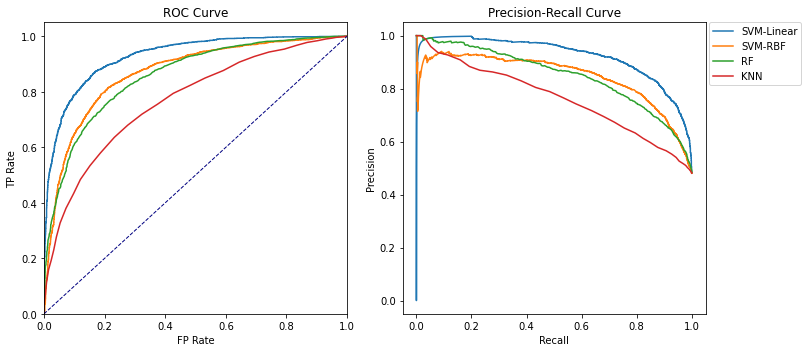

In [4]:
def roc(results, ax=None, labels=True):
    if ax == None:
        ax = plt.gca()

    for res in results:
        cname = "{}".format(res.clf_name)
        label = res.clf_name if labels else "_no_legend_"
        ax.plot(res["fpr"], res["tpr"],  label=label)

    ax.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('FP Rate')
    ax.set_ylabel('TP Rate')
    ax.set_title('ROC Curve')
    
    return ax


def prc(results, ax=None, labels=True):
    if ax == None:
        ax = plt.gca()
        
    for r in results:
        label = r.clf_name if labels else "_no_legend_"
        ax.plot(r.prec_rec_curve[1], r.prec_rec_curve[0], label=label)
        
    ax.set_title("Precision-Recall Curve")
    ax.set_xlabel("Recall")
    ax.set_ylabel("Precision")

fig, ax = plt.subplots(1, 2, figsize=(10, 5))
roc(results, ax=ax[0])
prc(results, ax=ax[1], labels=False)

lgd = fig.legend(bbox_to_anchor=(1.12, 0.93))
fig.tight_layout();

fig.savefig("plots/cmp_models_curve.pdf", bbox_extra_artists=(lgd,), bbox_inches='tight')

In [6]:
rows = []
for r in results:
    prec = metrics.precision_score(r.real_cls, r.predictions)
    rec = metrics.recall_score(r.real_cls, r.predictions)
    rows.append({"Model": r.clf_name, "Precision": prec, "Recall": rec, "AUC": r.roc_auc})
resume = pd.DataFrame(rows)
resume

,Model,Precision,Recall,AUC
0,SVM-Linear,0.832051,0.864565,0.928574
1,SVM-RBF,0.786336,0.802398,0.867984
2,RF,0.784557,0.730906,0.856868
3,KNN,0.673037,0.719361,0.768532


In [7]:
print(resume.to_latex(index=False, float_format="%.3f"))

\begin{tabular}{lrrr}
\toprule
      Model &  Precision &  Recall &   AUC \\
\midrule
 SVM-Linear &      0.832 &   0.865 & 0.929 \\
    SVM-RBF &      0.786 &   0.802 & 0.868 \\
         RF &      0.785 &   0.731 & 0.857 \\
        KNN &      0.673 &   0.719 & 0.769 \\
\bottomrule
\end{tabular}

